# Data Init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
data = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df = data.copy()

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unused columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# change columns Name to type ={ spam or ham } and msg 
df.rename(columns = {"v1":"type" , "v2" : "msg"},inplace=True)

In [8]:
df.head(1)

,type,msg
0,ham,"Go until jurong point, crazy.. Available only ..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,type,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df["type"].value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

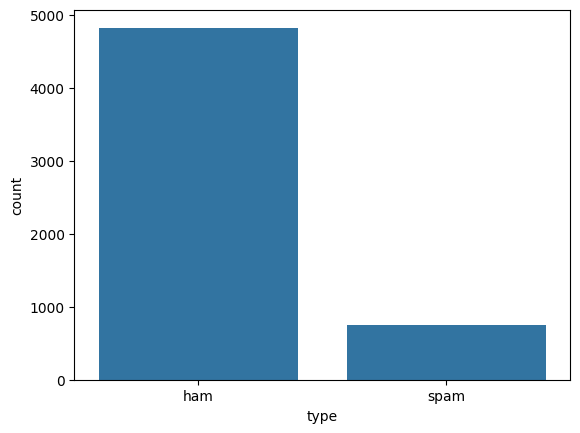

In [14]:
sns.countplot(data=df,x="type")

# Text processing

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
stop_words=stopwords.words("english")
def text_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
     # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [17]:
df["clean_msg"] = df["msg"].apply(text_preprocessing)

In [18]:
df.head()

,type,msg,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


## Using TF-IDF for extrace feautres

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
X = df["clean_msg"]
y = df["type"]

In [45]:
VecModel = TfidfVectorizer()
X_Vec = VecModel.fit_transform(X)

In [46]:
X_Vec.shape

(5572, 7254)

In [47]:
VecModel.get_feature_names_out()

array(['aah', 'aaniye', 'aaooooright', ..., 'zoom', 'zouk', 'zyada'],
      dtype=object)

In [48]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Vec, y, test_size=0.25, random_state=42)

# Training Models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:
LR =  LogisticRegression()
SVM =  SVC()

In [52]:
LR.fit(X_train,Y_train)
SVM.fit(X_train,Y_train)

SVC()

In [53]:
y_test_1 = LR.predict(X_val)
y_test_2 = SVM.predict(X_val)

In [31]:
from sklearn.metrics import  classification_report,f1_score,confusion_matrix,accuracy_score   

In [54]:
print("------ Logistic Regression ---------\n")
print(classification_report(Y_val,y_test_1))
print("-----------------------------------------------\n")
print("------ Support Vector Machines ---------\n")
print(classification_report(Y_val,y_test_2))

------ Logistic Regression ---------

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1202
        spam       0.96      0.60      0.74       191

    accuracy                           0.94      1393
   macro avg       0.95      0.80      0.85      1393
weighted avg       0.94      0.94      0.94      1393

-----------------------------------------------

------ Support Vector Machines ---------

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1202
        spam       0.99      0.79      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



Text(0.5, 1.0, ' LogisticRegression confusion_matrix')

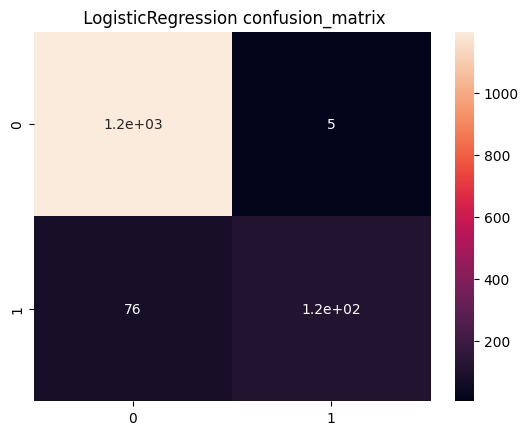

In [58]:
sns.heatmap(confusion_matrix(Y_val,y_test_1),annot=True)
plt.title(" LogisticRegression confusion_matrix")

Text(0.5, 1.0, ' Support Vector Machines confusion_matrix')

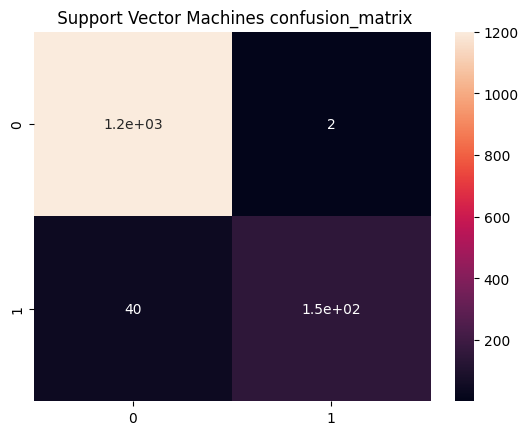

In [59]:
sns.heatmap(confusion_matrix(Y_val,y_test_2),annot=True)
plt.title(" Support Vector Machines confusion_matrix")

## Save model 

In [60]:
import joblib
joblib.dump(SVM, 'Support_Vector_Machines_model.pkl')

['Support_Vector_Machines_model.pkl']